In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [78]:
df = pd.read_csv('./data/survey_results_public.csv')
df_schema = pd.read_csv('./data/survey_results_schema.csv')
pd.set_option('display.max_colwidth', None)

In [79]:
class ResultDfMaker:
    def __init__(self, df):
        self.df = df

    def count_values_by_column(self, column):
        return self.df[column].value_counts()

    def create_df_from_series(self, series):
        return series.reset_index()

    def give_columns(self, dataframe, column_one, column_two):
        dataframe.columns = (column_one, column_two)

    def fix_repeat(self, df, column):
        df[column] = df[column].str.split(';')
        df = df.explode(column)
        return df.groupby(column)['count'].sum().reset_index()

    def sort_values_by_column(self, df):
        return df.sort_values(by='count', ascending=False)

    def get_value_df_by_column(self, column):
        series = self.count_values_by_column(column)
        result_df = self.create_df_from_series(series)
        self.give_columns(result_df, column, 'count')
        result_df = self.fix_repeat(result_df, column)
        result_df = self.sort_values_by_column(result_df)
        self.value_df = result_df
        return result_df
        
    def get_percentages_df_by_column(self, column):
        result_df = self.get_value_df_by_column(column)
        result_df['count'] = (result_df['count'] / result_df['count'].sum()) * 100
        return result_df
        


In [80]:
# filtering according to country and purchase influence columns

high_influence_df = df[(df['Country'] == 'Iran, Islamic Republic of...') & (df['PurchaseInfluence'] == 'I have a great deal of influence')]

In [81]:
# filtering according to country and purchase influence columns

some_influence_df = df[(df['Country'] == 'Iran, Islamic Republic of...') & (df['PurchaseInfluence'] == 'I have some influence')]


In [82]:
high_result_maker = ResultDfMaker(high_influence_df)
some_result_maker = ResultDfMaker(some_influence_df)

In [137]:
high_influence_employment_df = high_result_maker.get_value_df_by_column('Employment')
high_influence_employment_df

,Employment,count
0,"Employed, full-time",80
3,"Independent contractor, freelancer, or self-employed",40
1,"Employed, part-time",10
2,I prefer not to say,2


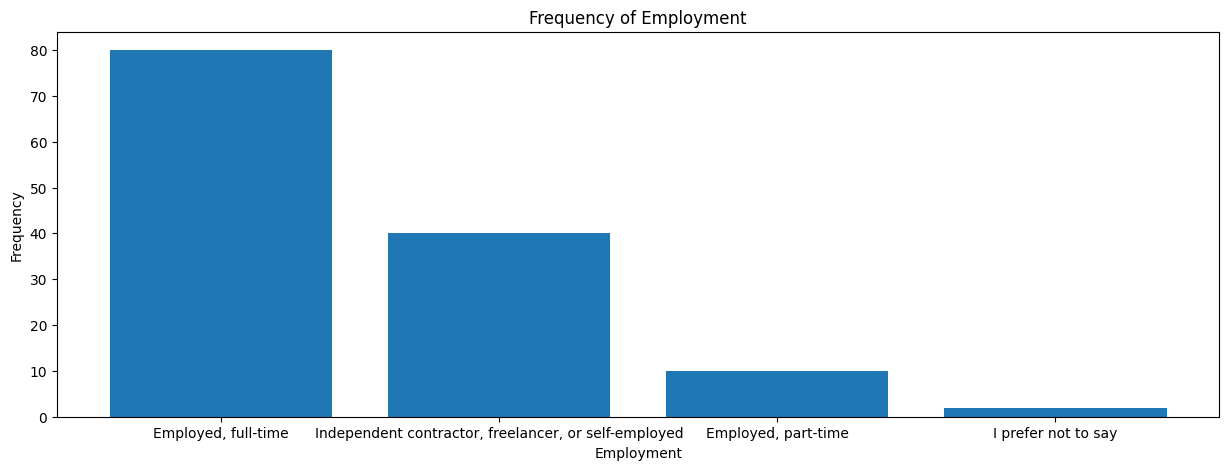

In [142]:
plt.figure(figsize=(15, 5))
plt.bar(high_influence_employment_df['Employment'], high_influence_employment_df['count'])
plt.xlabel('Employment')
plt.ylabel('Frequency')
plt.title('Frequency of Employment')

plt.show()

In [84]:
some_influence_employment_df = some_result_maker.get_value_df_by_column('Employment')
some_influence_employment_df

,Employment,count
0,"Employed, full-time",150
3,"Independent contractor, freelancer, or self-employed",33
1,"Employed, part-time",10
2,I prefer not to say,1


In [85]:
high_influence_devtype = high_result_maker.get_value_df_by_column('DevType')
high_influence_devtype

,DevType,count
11,"Developer, full-stack",42
7,"Developer, back-end",28
19,Project manager,5
10,"Developer, front-end",4
8,"Developer, desktop or enterprise applications",4
16,Engineering manager,3
18,Product manager,3
3,Data scientist or machine learning specialist,2
22,"Senior Executive (C-Suite, VP, etc.)",2
21,Security professional,2


In [86]:
some_influence_devtype = some_result_maker.get_value_df_by_column('DevType')
some_influence_devtype

,DevType,count
7,"Developer, back-end",43
11,"Developer, full-stack",42
10,"Developer, front-end",23
13,"Developer, mobile",16
8,"Developer, desktop or enterprise applications",14
3,Data scientist or machine learning specialist,7
9,"Developer, embedded applications or devices",7
17,Other (please specify):,2
4,DevOps specialist,2
20,Scientist,2


In [87]:
high_influence_yearscodepro = high_result_maker.get_value_df_by_column('YearsCodePro')
high_influence_yearscodepro

,YearsCodePro,count
21,8,18
1,10,12
18,5,11
15,3,9
19,6,8
17,4,8
20,7,7
11,20,6
10,2,5
23,Less than 1 year,4


In [88]:
some_influence_yearscodepro = some_result_maker.get_value_df_by_column('YearsCodePro')
some_influence_yearscodepro

,YearsCodePro,count
17,5,32
14,3,19
16,4,17
18,6,16
19,7,15
9,2,12
20,8,12
1,10,10
3,12,8
2,11,5


In [89]:
high_influence_edlevel = high_result_maker.get_value_df_by_column('EdLevel')
high_influence_edlevel

,EdLevel,count
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",52
2,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",42
5,Some college/university study without earning a degree,7
4,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",5
0,"Associate degree (A.A., A.S., etc.)",4
3,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",4
6,Something else,3


In [90]:
some_influence_edlevel = some_result_maker.get_value_df_by_column('EdLevel')
some_influence_edlevel

,EdLevel,count
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",91
2,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",51
6,Some college/university study without earning a degree,16
0,"Associate degree (A.A., A.S., etc.)",5
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",3
3,Primary/elementary school,2
5,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",2
7,Something else,2


In [91]:
high_influence_age = high_result_maker.get_value_df_by_column('Age')
high_influence_age

,Age,count
1,25-34 years old,60
2,35-44 years old,30
0,18-24 years old,18
3,45-54 years old,7
4,Under 18 years old,2


In [92]:
some_influence_age = some_result_maker.get_value_df_by_column('Age')
some_influence_age

,Age,count
1,25-34 years old,96
2,35-44 years old,40
0,18-24 years old,31
3,45-54 years old,4
4,55-64 years old,1


In [93]:
high_influence_language = high_result_maker.get_percentages_df_by_column('LanguageHaveWorkedWith')
high_influence_language

,LanguageHaveWorkedWith,count
18,JavaScript,10.876623
29,Python,9.902597
15,HTML/CSS,9.740260
34,SQL,9.740260
38,TypeScript,7.954545
4,C#,5.681818
2,Bash/Shell (all shells),5.519481
26,PHP,5.194805
17,Java,4.383117
5,C++,3.733766


In [94]:
some_influence_language = some_result_maker.get_percentages_df_by_column('LanguageHaveWorkedWith')
some_influence_language

,LanguageHaveWorkedWith,count
20,JavaScript,13.594771
17,HTML/CSS,10.588235
34,SQL,9.803922
30,Python,9.281046
6,C#,8.888889
38,TypeScript,7.973856
26,PHP,5.228758
7,C++,4.575163
19,Java,4.052288
4,Bash/Shell (all shells),3.398693


In [95]:

high_influence_opsys = high_result_maker.get_percentages_df_by_column('OpSysProfessional use')
high_influence_opsys

,OpSysProfessional use,count
14,Ubuntu,24.015748
15,Windows,21.259843
1,Android,9.055118
9,MacOS,8.267717
6,Debian,7.480315
16,Windows Subsystem for Linux (WSL),7.480315
2,Arch,3.543307
17,iOS,3.543307
11,Other Linux-based,3.543307
7,Fedora,2.755906


In [96]:

some_influence_opsys = some_result_maker.get_percentages_df_by_column('OpSysProfessional use')
some_influence_opsys

,OpSysProfessional use,count
10,Windows,30.063291
9,Ubuntu,20.253165
6,MacOS,12.025316
0,Android,10.443038
11,Windows Subsystem for Linux (WSL),8.860759
12,iOS,6.645570
4,Debian,4.113924
1,Arch,2.848101
13,iPadOS,1.582278
5,Fedora,0.949367


In [97]:

high_influence_ai = high_result_maker.get_percentages_df_by_column('AISearchHaveWorkedWith')
high_influence_ai

,AISearchHaveWorkedWith,count
2,ChatGPT,50.000000
1,Bing AI,18.571429
3,Google Bard AI,8.571429
8,WolframAlpha,7.142857
9,You.com,5.714286
7,Quora Poe,2.857143
5,Perplexity AI,2.857143
6,Phind,2.142857
4,Neeva AI,1.428571
0,Andi,0.714286


In [98]:

some_influence_ai = some_result_maker.get_percentages_df_by_column('AISearchHaveWorkedWith')
some_influence_ai

,AISearchHaveWorkedWith,count
2,ChatGPT,55.789474
1,Bing AI,23.157895
10,You.com,5.263158
9,WolframAlpha,4.210526
3,Google Bard AI,3.157895
8,Quora Poe,3.157895
7,Phind,2.105263
6,Perplexity AI,1.578947
0,Andi,0.526316
5,Neeva AI,0.526316


In [99]:

high_influence_communication = high_result_maker.get_percentages_df_by_column('OfficeStackSyncHaveWorkedWith')
high_influence_communication

,OfficeStackSyncHaveWorkedWith,count
13,Telegram,19.638826
2,Google Meet,17.155756
10,Skype,13.318284
14,Whatsapp,12.866817
0,Discord,9.706546
11,Slack,5.643341
7,Microsoft Teams,5.417607
15,Zoom,4.740406
6,Mattermost,2.483070
9,Signal,2.031603


In [100]:

some_influence_communication = some_result_maker.get_percentages_df_by_column('OfficeStackSyncHaveWorkedWith')
some_influence_communication

,OfficeStackSyncHaveWorkedWith,count
13,Telegram,19.966722
3,Google Meet,18.469218
11,Skype,13.144759
14,Whatsapp,12.645591
1,Discord,9.317804
12,Slack,5.657238
17,Zoom,5.657238
8,Microsoft Teams,4.991681
2,Google Chat,2.662230
9,Rocketchat,1.996672


In [101]:

high_influence_techlist = high_result_maker.get_percentages_df_by_column('TechList')
high_influence_techlist

,TechList,count
1,Investigate,80.180180
0,Given a list,14.414414
2,Other,5.405405


In [102]:

some_influence_techlist = some_result_maker.get_percentages_df_by_column('TechList')
some_influence_techlist

,TechList,count
1,Investigate,71.523179
0,Given a list,25.165563
2,Other,3.311258


In [103]:

high_influence_buy = high_result_maker.get_percentages_df_by_column('BuyNewTool')
high_influence_buy

,BuyNewTool,count
6,Start a free trial,23.323615
1,Ask developers I know/work with,22.448980
7,Visit developer communities like Stack Overflow,21.865889
3,Read ratings or reviews on third party sites like G2 Crowd,12.827988
0,Ask a generative AI tool,9.037901
4,Research companies that have advertised on sites I visit,6.122449
5,Research companies that have emailed me,3.498542
2,Other (please specify):,0.874636


In [104]:

some_influence_buy = some_result_maker.get_percentages_df_by_column('BuyNewTool')
some_influence_buy

,BuyNewTool,count
6,Start a free trial,27.601810
7,Visit developer communities like Stack Overflow,22.398190
1,Ask developers I know/work with,21.945701
3,Read ratings or reviews on third party sites like G2 Crowd,11.990950
0,Ask a generative AI tool,7.918552
4,Research companies that have advertised on sites I visit,4.977376
5,Research companies that have emailed me,2.714932
2,Other (please specify):,0.452489


In [131]:
class CorrelationCalculator:
    def __init__(self, df):
        self.df = df

    def non_rial_percentage(self):
        non_rial_number = self.df.loc[df['Currency'] != 'IRR	Iranian rial'].shape[0]
        total_number = self.df.shape[0]
        return f'{(non_rial_number / total_number)* 100} percent of these Iranian developers are not paid in Rials!'

    def remove_non_rials(self):
        self.df = self.df.loc[df ['Currency'] == 'IRR	Iranian rial']

    def get_corr_df(self):
        self.corr_df = self.df[['Age', 'YearsCodePro', 'OrgSize', 'CompTotal']]

    def fill_empty_ages(self):
        most_frequent_age =  self.corr_df['Age'].mode()[0]
        self.corr_df.loc[self.corr_df['Age'] == 'NA'] = most_frequent_age        

    def numberize_ages(self):
        age_mapping = {
            'Under 18 years old': 15,
            '18-24 years old': 21,
            '25-34 years old': 30,
            '35-44 years old': 40,
            '45-54 years old': 50,
            '55-64 years old': 60            
        }
        self.corr_df.loc[:, 'Age'] = self.corr_df['Age'].map(age_mapping)
        
    def calculate_years_mean(self):
        mean_df = self.corr_df.copy()
        mean_df['YearsCodePro'] = mean_df['YearsCodePro'].replace({
            'Less than 1 year': 0.5,
            'NA': np.nan
        })
        mean_df['YearsCodePro'] = pd.to_numeric(mean_df['YearsCodePro'], errors='coerce')
        mean_df = mean_df.dropna(subset=['YearsCodePro'])
        average_years = mean_df['YearsCodePro'].mean()
        return average_years
         
    def fix_yearscodepros(self):
        average_years = self.calculate_years_mean()
        years_replacing = {
            np.nan: average_years,
            'Less than 1 year': 0.5
            
        }
        self.corr_df.loc[:, 'YearsCodePro'] = self.corr_df['YearsCodePro'].replace(years_replacing)

    def fill_empty_orgsizes(self):
        most_frequent_orgsize =  self.corr_df['OrgSize'].mode()[0]
        self.corr_df.loc[self.corr_df['OrgSize'] == 'NA', 'OrgSize'] = most_frequent_orgsize
        self.corr_df.loc[self.corr_df['OrgSize'] == 'I don’t know', 'OrgSize'] = most_frequent_orgsize

    def numberize_orgsizes(self):
        orgsize_mapping = {
            'Just me - I am a freelancer, sole proprietor, etc.': 1,
            '2 to 9 employees': 5,
            '10 to 19 employees': 15,
            '20 to 99 employees': 60,
            '100 to 499 employees': 300,
            '500 to 999 employees': 750,
            '1,000 to 4,999 employees': 3000,
            '5,000 to 9,999 employees': 7500,
            '10,000 or more employees': 12500
        }
        self.corr_df.loc[:, 'OrgSize'] = self.corr_df['OrgSize'].map(orgsize_mapping)

    def calculate_comp_mean(self):
        mean_df = self.corr_df.copy()
        mean_df.loc[:, 'CompTotal'] = mean_df['CompTotal'].replace({'NA': np.nan})
        mean_df.loc[mean_df['CompTotal'] < 120_000_000, 'CompTotal'] = np.nan
        mean_df.loc[mean_df['CompTotal'] > 12_000_000_000, 'CompTotal'] = np.nan
        mean_df.dropna(subset='CompTotal', inplace=True)
        average_comp = mean_df['CompTotal'].mean()
        return average_comp

    def fix_comptotals(self):
        average_comp = self.calculate_comp_mean()
        self.corr_df.loc[:, 'CompTotal'] = self.corr_df['CompTotal'].replace({np.nan: average_comp})
        self.corr_df.loc[self.corr_df['CompTotal'] < 120_000_000, 'CompTotal'] = average_comp
        self.corr_df.loc[self.corr_df['CompTotal'] > 12_000_000_000, 'CompTotal'] = average_comp

    def get_corr(self):
        self.remove_non_rials()
        self.get_corr_df()
        self.fill_empty_ages()
        self.numberize_ages()
        self.fix_yearscodepros()
        self.fill_empty_orgsizes()
        self.numberize_orgsizes()
        self.fix_comptotals()
        return self.corr_df.corr()

In [132]:
high_corr_calculator = CorrelationCalculator(high_influence_df)
some_corr_calculator = CorrelationCalculator(some_influence_df)

In [133]:
high_corr_result = high_corr_calculator.get_corr()
high_corr_result

,Age,YearsCodePro,OrgSize,CompTotal
Age,1.000000,0.752774,-0.047666,0.017891
YearsCodePro,0.752774,1.000000,-0.041725,0.037089
OrgSize,-0.047666,-0.041725,1.000000,0.114189
CompTotal,0.017891,0.037089,0.114189,1.000000


In [134]:
some_corr_result = some_corr_calculator.get_corr()
some_corr_result

,Age,YearsCodePro,OrgSize,CompTotal
Age,1.000000,0.679951,0.147431,0.169511
YearsCodePro,0.679951,1.000000,0.106934,0.244175
OrgSize,0.147431,0.106934,1.000000,0.143705
CompTotal,0.169511,0.244175,0.143705,1.000000
